In [17]:
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.image as img

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
def create_data_frame(default_image_path:str, data_path:str, level_path:str, source_path:str):
    data = {}
    data['latex'] = []
    data['seq_len'] = []
    data['aspect_ratio'] = []
    data['image_width'] = []
    data['image_height'] = []
    data['level'] = []
    data['source'] = []
    all_latex_list = []
    lv1_latex_list = []
    lv2_latex_list = []
    lv3_latex_list = []
    lv4_latex_list = []
    lv5_latex_list = []
    
    with open(level_path) as f:
        level_info = {}
        for line in f:
            path, level = line.replace("\n","").split("\t")
            level_info[path] = int(level)
            
    with open(source_path) as f:
        source_info = {}
        for line in f:
            path, source = line.replace("\n","").split("\t")
            source_info[path]=str(source)
            
    with open(data_path) as f:
        for idx, line in enumerate(f):
            image_path, latex = line.replace("\n","").split("\t")
            image = Image.open(default_image_path+image_path)
            width, height = image.size
            data['aspect_ratio'].append(round(width / height,1))
            data['image_width'].append(int(width))
            data['image_height'].append(int(height))
            latex=latex.split(" ")
            data['latex'].append(latex)
            data['seq_len'].append(len(latex))
            level = level_info[image_path]
            data['level'].append(level)
            source = source_info[image_path]
            data['source'].append(source)
            all_latex_list += latex
            if level==1:
                lv1_latex_list += latex
            elif level==2:
                lv2_latex_list += latex
            elif level==3:
                lv3_latex_list += latex                
            elif level==4:
                lv4_latex_list += latex
            else :
                lv5_latex_list += latex
    df = pd.DataFrame.from_dict(data)
    lv_latex_list=[lv1_latex_list, lv2_latex_list, lv3_latex_list, lv4_latex_list, lv5_latex_list]
    return df, all_latex_list, lv_latex_list

In [25]:
default_image_path = "/opt/ml/input/data/train_dataset/images/"
data_path = "/opt/ml/input/data/train_dataset/gt.txt"
level_path = "/opt/ml/input/data/train_dataset/level.txt"
source_path = "/opt/ml/input/data/train_dataset/source.txt"

df, all_latex_list, lv_latex_list = create_data_frame(default_image_path=default_image_path,\
                                                      data_path=data_path,\
                                                      level_path=level_path,\
                                                      source_path=source_path)

In [26]:
df.columns

Index(['latex', 'seq_len', 'aspect_ratio', 'image_width', 'image_height',
       'level', 'source'],
      dtype='object')

In [27]:
df.describe()

,seq_len,aspect_ratio,image_width,image_height,level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,17.536930,4.344388,1309.317910,333.098100,2.392250
std,14.952702,2.484526,1120.911322,312.306097,0.845575
min,1.000000,0.100000,35.000000,20.000000,1.000000
25%,7.000000,2.600000,563.000000,173.000000,2.000000
50%,13.000000,3.800000,1012.000000,255.000000,2.000000
75%,23.000000,5.500000,1732.000000,393.000000,3.000000
max,252.000000,33.900000,11810.000000,10020.000000,5.000000


# seq_len min

In [44]:
df[df['seq_len'] == 1]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
6810,[\gamma],1,1.0,290,300,3,0
11284,[f],1,0.8,91,113,4,0
46504,[\Phi],1,1.4,46,34,2,0
53959,[\pi],1,1.6,41,25,2,0
99988,[\Phi],1,1.4,42,31,2,0


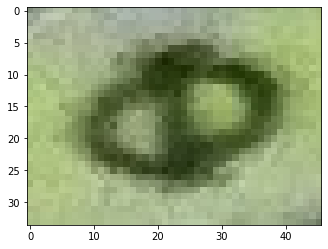

In [67]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_46504.jpg')
plt.imshow(test)
plt.show()

# seq_len max

In [45]:
df[df['seq_len']==252]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
43110,"[\frac, {, \partial, {, F, }, }, {, \partial, ...",252,3.3,2999,907,1,0


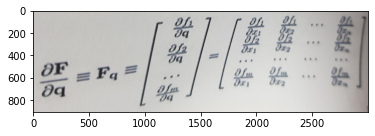

In [46]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_43110.jpg')
plt.imshow(test)
plt.show()

# aspect_ratio min

In [53]:
df[df['aspect_ratio']==0.1]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
29,"[a, =, \sqrt, {, a, _, {, r, }, ^, {, 2, }, +,...",58,0.1,444,3661,4,1
48,"[3, x, +, 6, y, -, \left(, x, -, y, \right)]",11,0.1,125,922,2,1
874,"[n, \times, \left(, n, -, 1, \right), \times, ...",21,0.1,260,3283,3,1
1005,"[=, -, 2, x, +, \frac, {, 1, }, {, 3, }, a, +,...",21,0.1,193,1361,2,1
1032,"[\lim, _, {, m, \to, \infty, }, \left(, 1, +, ...",32,0.1,550,4526,3,1
...,...,...,...,...,...,...,...
97591,"[F, _, {, f, }, =, \mu, _, {, k, }, N, =, 8, 4...",19,0.1,175,1295,4,1
97841,"[\overline, {, a, }, _, {, B, n, }, =, 1, ., 5...",33,0.1,442,3502,4,1
98582,"[l, =, 0, ., 5, m, \dot, l, =, 0, ., 2, m, /, ...",30,0.1,245,3050,4,1
99019,"[\frac, {, 4, }, {, a, }, -, \frac, {, 3, }, {...",27,0.1,276,1940,2,1


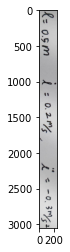

In [80]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_98582.jpg')
plt.imshow(test)
plt.show()

# aspect_ratio max

In [47]:
df[df['aspect_ratio']==33.9]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
8286,"[=, \left(, \alpha, +, 1, \right), +, \left(, ...",34,33.9,2612,77,2,0


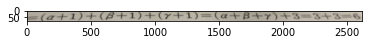

In [48]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_08286.jpg')
plt.imshow(test)
plt.show()

# aspect_ratio 1.0

In [81]:
df[df['aspect_ratio']==1]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
848,"[8, \times, \frac, {, 1, }, {, 7, }]",9,1.0,392,374,2,1
1090,"[x, =, \frac, {, \sqrt, {, 2, }, }, {, 2, }]",12,1.0,700,675,3,1
2014,"[\log, 1, ., 3, 2, =, 0, ., 1, 2]",10,1.0,128,131,3,0
2687,"[p, =]",2,1.0,198,199,3,1
3103,"[y, -, 4, =, \frac, {, 4, -, \left(, -, 1, \ri...",26,1.0,331,336,3,1
...,...,...,...,...,...,...,...
98177,"[\frac, {, a, -, b, }, {, a, +, b, }]",11,1.0,448,448,2,0
99290,"[d, ^, 2, y, |, d, x, ^, {, 2, }, +, y, =, 0]",15,1.0,367,386,3,0
99477,"[a, _, {, 1, 0, }]",6,1.0,225,215,3,1
99682,"[3, 3, \div, 1, 1, \times, 2, =]",8,1.0,688,656,1,1


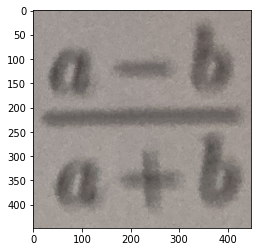

In [93]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_98177.jpg')
plt.imshow(test)
plt.show()

# image_width min

In [63]:
df[df['image_width']==35]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
91741,"[x, =, 0]",3,0.4,35,81,2,1


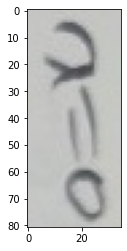

In [64]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_91741.jpg')
plt.imshow(test)
plt.show()

# image_width max

In [49]:
df[df['image_width']==11810]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
42424,"[e, ^, {, A, t, }, =, \left(, \begin{matrix}, ...",160,6.0,11810,1970,3,0


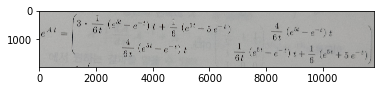

In [50]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_42424.jpg')
plt.imshow(test)
plt.show()

# image_height min

In [56]:
df[df['image_height']==20]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
24371,"[5, 0, +, 2, =]",5,3.6,72,20,1,0


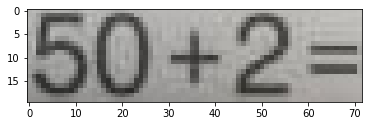

In [57]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_24371.jpg')
plt.imshow(test)
plt.show()

# image_height max

In [51]:
df[df['image_height']==10020]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
24979,"[=, \frac, {, \left(, n, +, 2, \right), \left(...",32,0.1,1359,10020,3,1


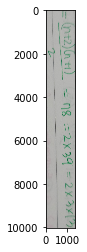

In [52]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_24979.jpg')
plt.imshow(test)
plt.show()

In [95]:
df

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
0,"[4, \times, 7, =, 2, 8]",6,4.2,903,213,1,1
1,"[a, ^, {, x, }, >, q]",7,3.7,435,118,2,0
2,"[8, \times, 9]",3,2.0,348,172,2,0
3,"[\sum, _, {, k, =, 1, }, ^, {, n, -, 1, }, b, ...",30,3.2,964,299,3,1
4,"[I, =, d, q, /, d, t]",7,3.4,700,208,4,0
...,...,...,...,...,...,...,...
99995,"[P, \left(, X, =, x, _, {, i, }, \right), =, p...",13,4.3,788,182,3,1
99996,"[=, 2, a, ^, {, 2, }, +, 2, b, ^, {, 2, }, +, ...",26,5.9,1260,212,2,0
99997,"[y, -, 3, =]",4,1.8,400,218,2,0
99998,"[\int, _, {, 0, }, ^, {, k, }, \frac, {, e, ^,...",46,2.8,2188,777,3,1


In [96]:
df[df['level']==5]

,latex,seq_len,aspect_ratio,image_width,image_height,level,source
340,"[4, x, +, 2]",4,1.8,224,124,5,0
442,"[\left(, m, _, {, s, }, =, s, ,, s, -, 1, ,, \...",16,3.9,1137,292,5,0
753,"[r, _, {, n, }, =, r, _, {, m, }, ,, s, _, {, ...",19,2.6,556,213,5,0
768,"[v, _, {, o, }, =, -, \int, \frac, {, v, _, {,...",60,3.5,1553,447,5,0
1177,"[\frac, {, 2, 5, }, {, 4, }, =, 6, \frac, {, 1...",17,1.9,891,457,5,0
...,...,...,...,...,...,...,...
99548,"[7, \times, 9]",3,2.2,295,133,5,0
99567,"[x, ^, {, 2, }, +, 4, x, +, 3, =, \left(, x, +...",21,5.6,2272,408,5,0
99674,"[S, _, {, T, }, =, \sum, _, {, i, =, 1, }, ^, ...",58,2.9,1119,383,5,0
99701,"[Z, _, {, r, e, f, }, =, 1, 1, 6, 0, 5, \times...",43,2.8,656,238,5,0


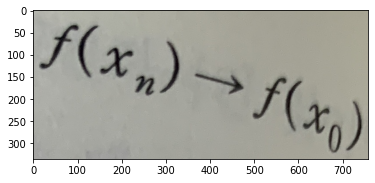

In [105]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_99820.jpg')
plt.imshow(test)
plt.show()

In [109]:
level_5_df = df[df['level']==5]

In [111]:
level_5_list = level_5_df.sample(50).index

Int64Index([19082,  2956, 63899, 65657, 89839, 98243, 65400, 51153,  8175,
            20449, 19200, 31714, 69669, 45648, 99674, 37370, 40296, 96012,
            44606, 69195, 70696,  4535, 99548, 85822, 77632, 75057, 45087,
            98178, 98215, 84944, 55698, 32710, 40536, 54967, 62344, 19402,
             9172, 84187, 45605, 85289, 72908, 69659, 27371, 10415, 85099,
            69758, 10570, 91273, 50284, 32230],
           dtype='int64')

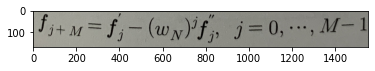

In [172]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_32230.jpg')
plt.imshow(test)
plt.show()

In [146]:
level_5_df.loc[85822].latex

['z', '_', '{', '\\alpha', '/', '2', '}']

In [173]:
level_1_df = df[df['level']==1]

In [174]:
level_1_list = level_1_df.sample(50).index

In [175]:
level_1_list

Int64Index([67957,  2492, 38459, 76391, 88364, 41450,  3718, 43641, 42184,
            80351, 68527, 75446, 53832, 49484, 66984, 63952, 82672, 77785,
            49154, 40995, 85328, 41753, 12629, 46846, 38787, 31833, 26815,
            43054, 80785, 22658, 32020, 67611, 46534, 62144, 70400, 26313,
            95721, 13531, 88757, 86085, 82169, 14981, 23675, 94465, 89944,
            13152, 33664, 42765,  9292, 53476],
           dtype='int64')

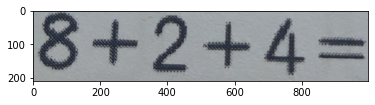

In [204]:
test = img.imread('/opt/ml/input/data/train_dataset/images/train_26815.jpg')
plt.imshow(test)
plt.show()

In [192]:
level_1_df.loc[66984]

latex           [\cos, 2, \alpha, =, \cos, ^, {, 2, }, \alpha,...
seq_len                                                        17
aspect_ratio                                                  9.2
image_width                                                  1816
image_height                                                  198
level                                                           1
source                                                          0
Name: 66984, dtype: object